<a href="https://colab.research.google.com/github/swathigoverdhanam/CapstoneProject/blob/main/SwathiSusarapu_PredictiveAnalysis_Interim_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Context
Vehicle breakdowns and engine failures lead to significant financial losses for both individual owners and fleet operators. Unexpected engine failures can cause expensive repairs, operational downtime, and safety risks. Predictive maintenance in the automotive industry can help minimize these issues by leveraging sensor data to forecast potential failures before they occur.

Automobile manufacturers, fleet managers, and service providers aim to develop data-driven solutions to improve engine reliability and optimize maintenance schedules. By analyzing engine health parameters such as RPM, temperature, pressure, and other sensor readings, machine learning models can be trained to predict when an engine requires maintenance, allowing proactive intervention before a failure occurs.

The sensor values in the dataset are consistent with the operating parameters of larger and small engines commonly found in equipment like Vechiles, lawnmowers, portable generators, and compact machinery. Some engines operate at lower RPMs, pressures, and temperatures compared to larger automotive engines and vice versa. Therefore, the data is appropriate for developing predictive maintenance models tailored to large and small engine applications.

#Objective
As a Data Scientist, your goal is to build a predictive maintenance model that can analyze historical and real-time engine sensor data to identify potential failures. The model should accurately classify whether an engine requires maintenance or is operating normally.

This solution will help:

Reduce unplanned breakdowns and costly repairs.
Improve vehicle performance and engine lifespan.
Optimize maintenance schedules to minimize downtime
Provide data-driven insights to manufacturers and fleet operators for better decision-making.

#Data Dictionary

Engine_RPM: The number of revolutions per minute (RPM) of the engine, indicating engine speed. It is defined in Revolutions per Minute (RPM).

Lub_Oil_Pressure: The pressure of the lubricating oil in the engine, essential for reducing friction and wear. It is defined in bar or kilopascals (kPa)

Fuel_Pressure: The pressure at which fuel is supplied to the engine, critical for proper combustion. It is defined in bar or kilopascals (kPa)

Coolant_Pressure: The pressure of the engine coolant, affecting engine temperature regulation. It is defined in bar or kilopascals (kPa)

Lub_Oil_Temperature: The temperature of the lubricating oil, which impacts viscosity and engine performance. It is defined in degrees Celsius (°C)

Coolant_Temperature: The temperature of the engine coolant, crucial for preventing overheating. It is defined in degrees Celsius (°C)

Engine_Condition: A categorical or numerical label representing the health of the engine, potentially indicating normal operation or various levels of wear and failure risks. It is defined as a categorical variable (0/1) representing a state such as "0 = Off/False/Active" and "1 = On/True/Faulty"

#install libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for model serialization
import joblib

# for creating a folder
import os

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

#Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Dataset, Data collection and background

In [4]:
# Load the dataset from a CSV file into a Pandas DataFrame
MachineData = pd.read_csv("/content/drive/MyDrive/AIML_Projects/engine_data.csv")

In [5]:
MachineData.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [6]:
# Display the number of rows and columns in the dataset
MachineData.shape

(19535, 7)

In [7]:
# Display the column names of the dataset
MachineData.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [8]:
# checking shape of the data
print(f"There are {MachineData.shape[0]} rows and {MachineData.shape[1]} columns.")

There are 19535 rows and 7 columns.


In [9]:
# checking column datatypes and number of non-null values
MachineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [10]:
# checking for duplicate values
MachineData.duplicated().sum()

np.int64(0)

In [11]:
# checking for missing values
MachineData.isnull().sum()

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


# Univariate analysis

In [12]:
# Define the target variable for the classification task
target = 'Engine Condition'

# List of numerical features in the dataset
numeric_cols = MachineData.select_dtypes('number').columns.tolist()

# List of categorical features in the dataset
categorical_cols = MachineData.select_dtypes('category').columns.tolist()

In [13]:
numeric_cols

['Engine rpm',
 'Lub oil pressure',
 'Fuel pressure',
 'Coolant pressure',
 'lub oil temp',
 'Coolant temp',
 'Engine Condition']

In [14]:
#numeric_cols = numeric_cols.remove('Engine_Condition')
column_to_remove = 'Engine_Condition'
updated_numeric_cols = list(set(numeric_cols) - {column_to_remove})

In [15]:
# Generate summary statistics for numerical features
MachineData[updated_numeric_cols].describe()

,Coolant pressure,Engine rpm,Engine Condition,lub oil temp,Lub oil pressure,Fuel pressure,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,2.335369,791.239263,0.630509,77.643420,3.303775,6.655615,78.427433
std,1.036382,267.611193,0.482679,3.110984,1.021643,2.761021,6.206749
min,0.002483,61.000000,0.000000,71.321974,0.003384,0.003187,61.673325
25%,1.600466,593.000000,0.000000,75.725990,2.518815,4.916886,73.895421
50%,2.166883,746.000000,1.000000,76.817350,3.162035,6.201720,78.346662
75%,2.848840,934.000000,1.000000,78.071691,4.055272,7.744973,82.915411
max,7.478505,2239.000000,1.000000,89.580796,7.265566,21.138326,195.527912


In [16]:
# Compute the proportion of each class in the target variable
MachineData[target].value_counts(normalize=True)

,proportion
Engine Condition,
1,0.630509
0,0.369491


In [22]:
MachineData[target].value_counts()

,count
Engine Condition,
1,12317
0,7218


In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

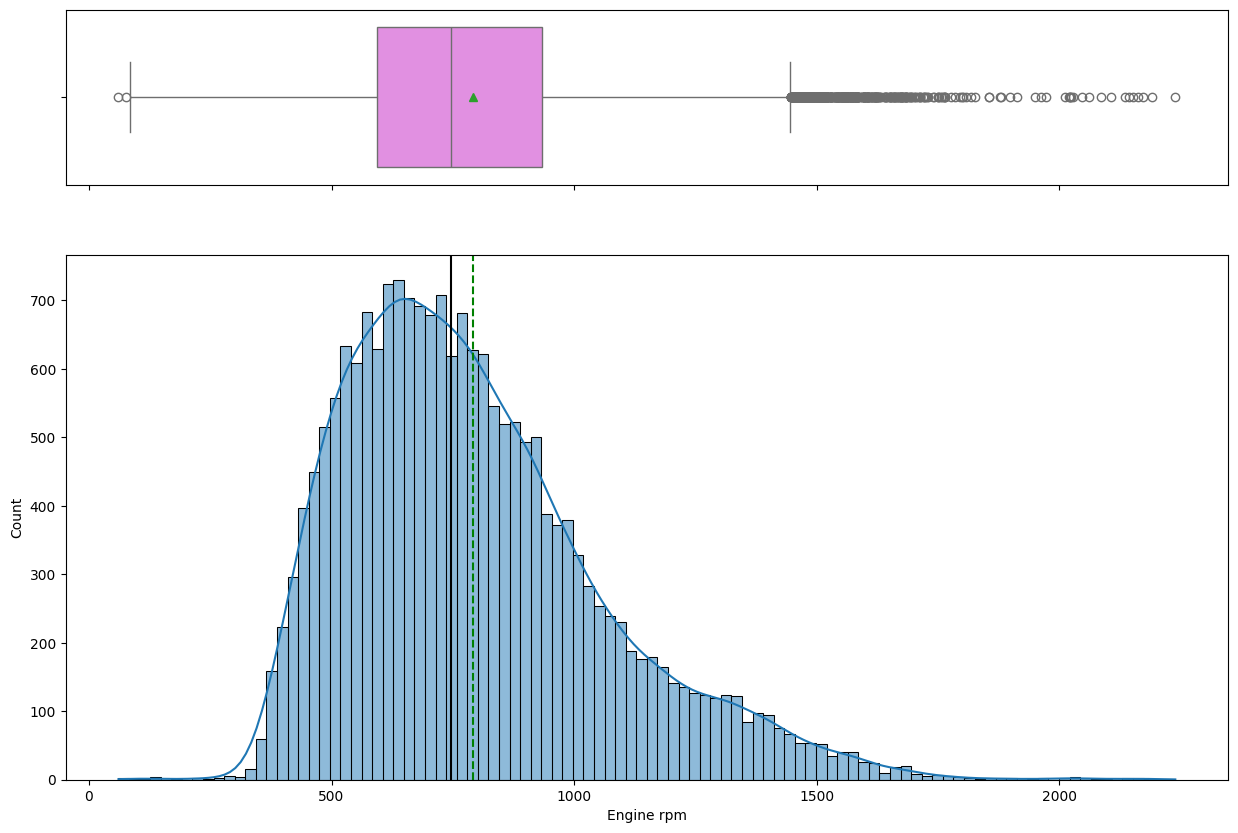

In [20]:
histogram_boxplot(MachineData, "Engine rpm", bins=100, kde=True)

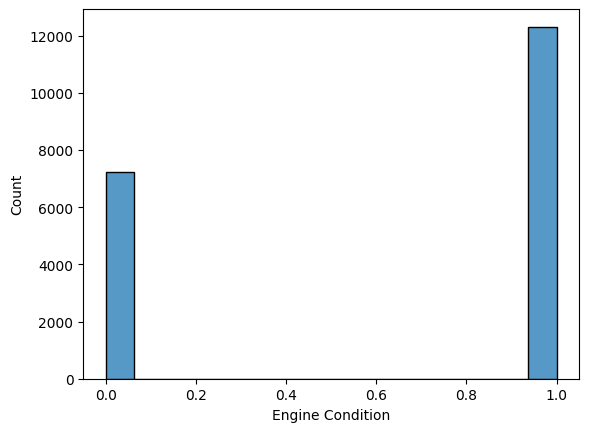

In [21]:
# Check the distribution of the target variable
sns.histplot(MachineData[target]);

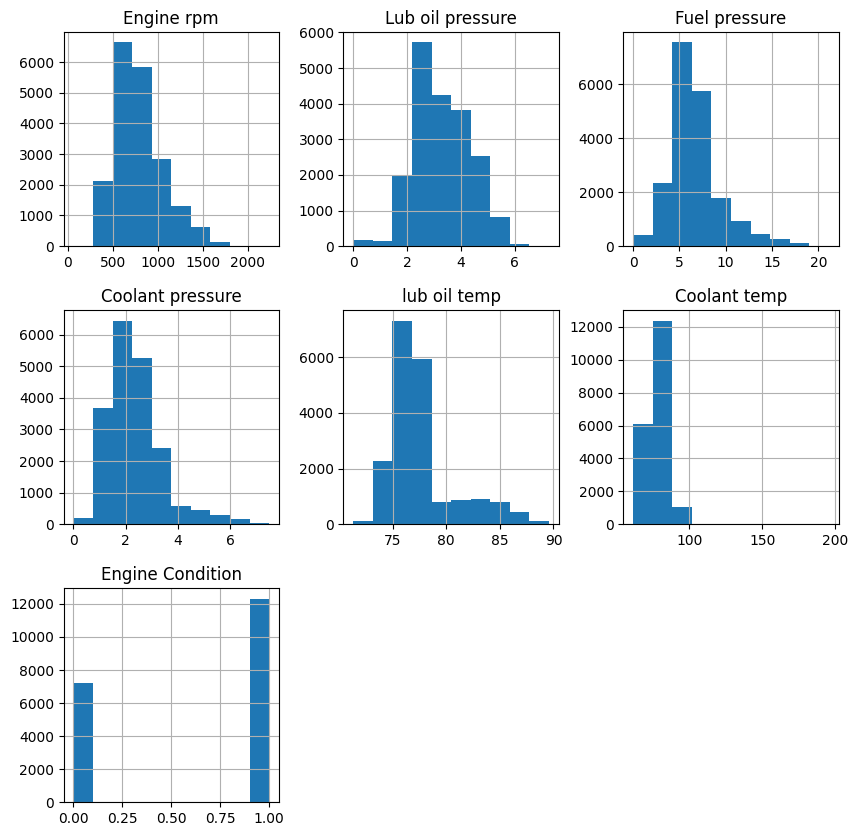

In [24]:
# creating histograms
MachineData.hist(figsize=(10, 10))
plt.show()

#Bivariate analysis

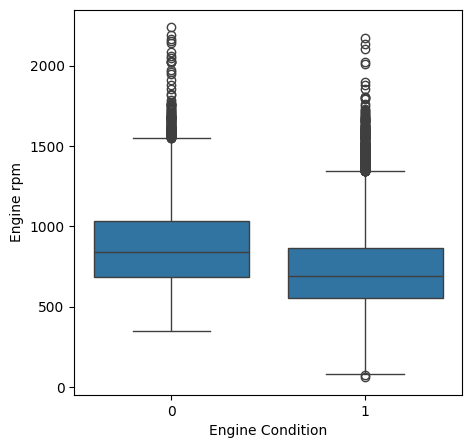

In [26]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Engine Condition", y="Engine rpm", data=MachineData)
plt.show()

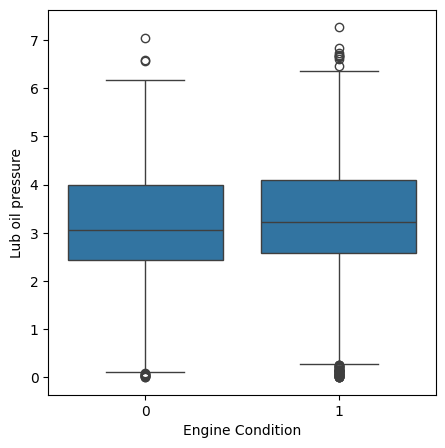

In [28]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Engine Condition", y="Lub oil pressure", data=MachineData)
plt.show()

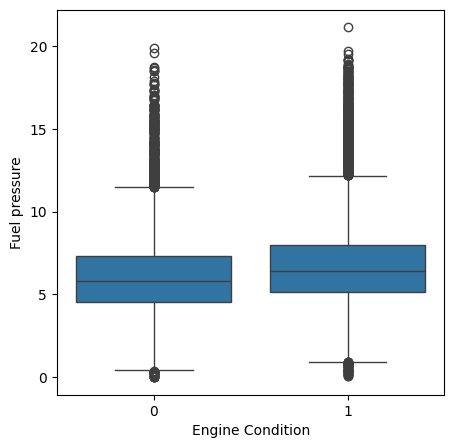

In [29]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Engine Condition", y="Fuel pressure", data=MachineData)
plt.show()

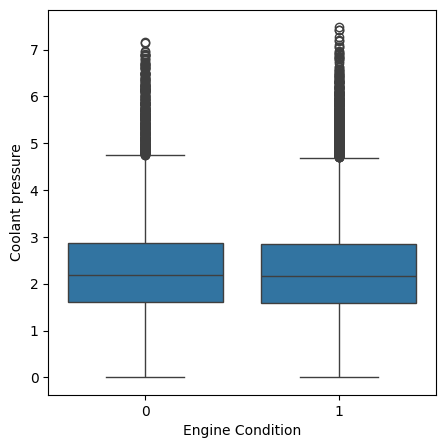

In [30]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Engine Condition", y="Coolant pressure", data=MachineData)
plt.show()

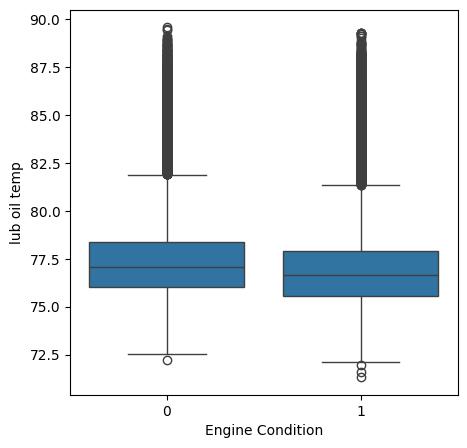

In [31]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Engine Condition", y="lub oil temp", data=MachineData)
plt.show()

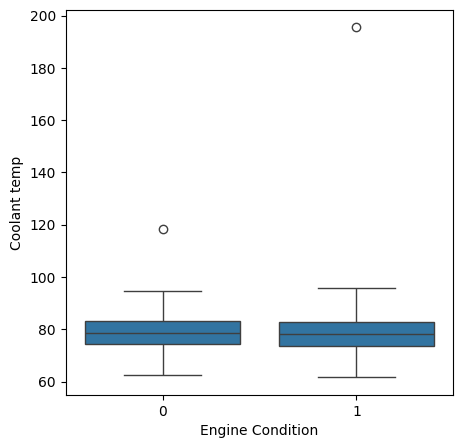

In [32]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Engine Condition", y="Coolant temp", data=MachineData)
plt.show()

#Multivariate analysis

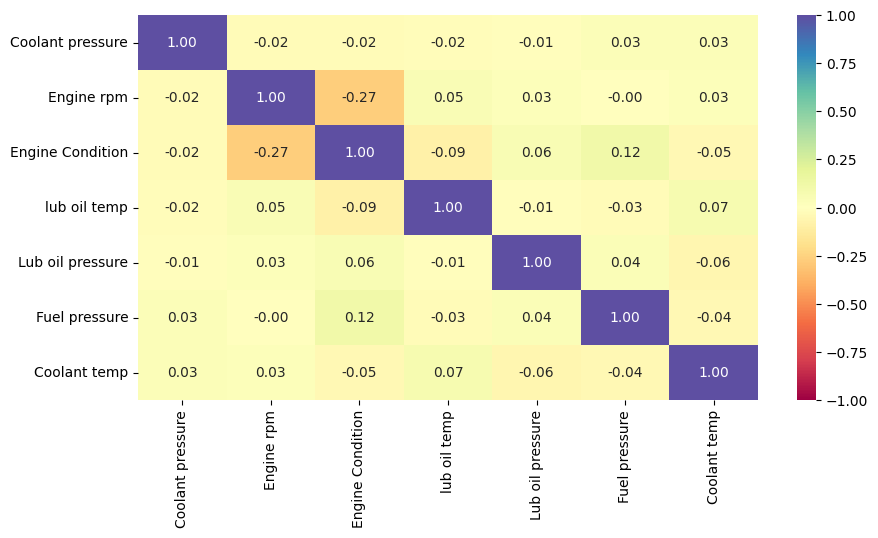

In [33]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    MachineData[updated_numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#Data Preparation

Load the dataset directly from the Hugging Face data space

In [34]:
from datasets import load_dataset

In [35]:
dataset = load_dataset("SwathiSusarapu/PredictiveAnalysis_dataset")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


engine_data.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/19535 [00:00<?, ? examples/s]

In [36]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp', 'Engine Condition'],
        num_rows: 19535
    })
})

In [40]:
# Convert the dataset split to a pandas DataFrame for easier column selection
train_df = dataset['train'].to_pandas()

# Define predictor matrix (X) using selected numeric and categorical features
X = train_df[numeric_cols + categorical_cols]

# Define target variable
y = train_df[target]

Split the cleaned dataset into training and testing sets, and save them locally.

In [79]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(11721, 7) (3907, 7) (3907, 7)


In [80]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (11721, 7)
Shape of test set :  (3907, 7)
Percentage of classes in training set:
Engine Condition
1    0.630492
0    0.369508
Name: proportion, dtype: float64
Percentage of classes in test set:
Engine Condition
1    0.630407
0    0.369593
Name: proportion, dtype: float64


Upload the resulting train and test datasets back to the Hugging Face data space.

In [43]:
from huggingface_hub import login
login()

In [46]:
# Initialize the API
api = HfApi()

# Upload files
api.upload_folder(
    folder_path="/content/drive/MyDrive/Colab Notebooks",  # Local folder path
    repo_id="SwathiSusarapu/TestSpace",  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/SwathiSusarapu/TestSpace/commit/2a3dbc201ab6777965c338298b163f3c17618e7c', commit_message='Upload folder using huggingface_hub', commit_description='', oid='2a3dbc201ab6777965c338298b163f3c17618e7c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/SwathiSusarapu/TestSpace', endpoint='https://huggingface.co', repo_type='space', repo_id='SwathiSusarapu/TestSpace'), pr_revision=None, pr_num=None)

In [47]:
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_pandas(X_train)
test_dataset = Dataset.from_pandas(X_test)

dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

In [48]:
repo_name = "SwathiSusarapu/PredictiveAnalysis_dataset" # Replace 'username' and 'my-awesome-dataset'
dataset_dict.push_to_hub(repo_name)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              :  67%|######6   |  600kB /  896kB            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              : 100%|##########|  226kB /  226kB            

CommitInfo(commit_url='https://huggingface.co/datasets/SwathiSusarapu/PredictiveAnalysis_dataset/commit/b46b5d6160f4b0f69934e2abf830d85e6fd4eccd', commit_message='Upload dataset', commit_description='', oid='b46b5d6160f4b0f69934e2abf830d85e6fd4eccd', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/SwathiSusarapu/PredictiveAnalysis_dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='SwathiSusarapu/PredictiveAnalysis_dataset'), pr_revision=None, pr_num=None)

#Model Building with Experimentation Tracking

Load the train and test data from the Hugging Face data space

In [52]:
dataset_dict = load_dataset("SwathiSusarapu/PredictiveAnalysis_dataset")

In [53]:
train_data = dataset_dict["train"]
test_data = dataset_dict["test"]

# Optional: print to verify the loaded data
print("Train data:", train_data)
print("Test data:", test_data)

Train data: Dataset({
    features: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp', 'Engine Condition', '__index_level_0__'],
    num_rows: 15628
})
Test data: Dataset({
    features: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp', 'Engine Condition', '__index_level_0__'],
    num_rows: 3907
})


Define a model and parameters

In [85]:
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [71]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [72]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [83]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=42, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=42)))
models.append(("Adaboost", AdaBoostClassifier(random_state=42)))
models.append(("dtree", DecisionTreeClassifier(random_state=42, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance:

Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0


Tune the model with the defined parameters

In [86]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters are {'n_estimators': np.int64(10), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:


In [87]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=20, random_state=1)

In [89]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Register the best model in the Hugging Face model hub

I am not sure what am I missing here. I see all performance as 1 which is alarming. Please help. I tried all the models and each returns the same 1 all the time.